# The Canny Edge Detecter, and Other Line Detection Algorithms - 2D Operators
Turning edges to thin lines, and combining edges using different thresholds to create a clear defined edge.

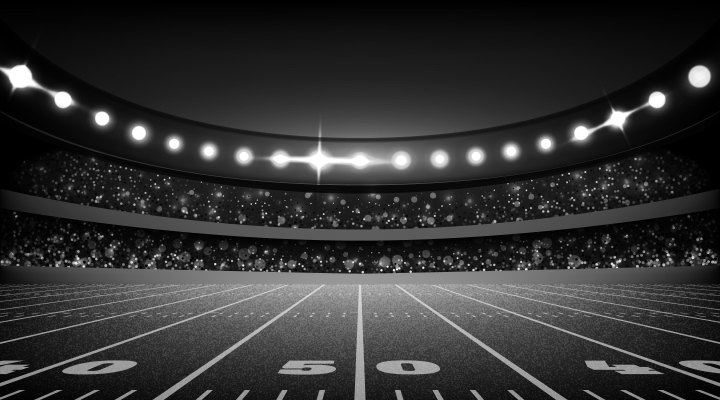

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

r_img = cv2.imread('/content/drive/MyDrive/media/11807166_4840638.jpg', 0)
#scaling down the image, taken from https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/
scale_percent = 20 # percent of original size
width = int(r_img.shape[1] * scale_percent / 100)
height = int(r_img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img = cv2.resize(r_img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(img)

#Image by pikisuperstar on Freepik "https://www.freepik.com/free-vector/realistic-american-football-stadium_11807166.htm#query=football%20field&position=4&from_view=keyword"

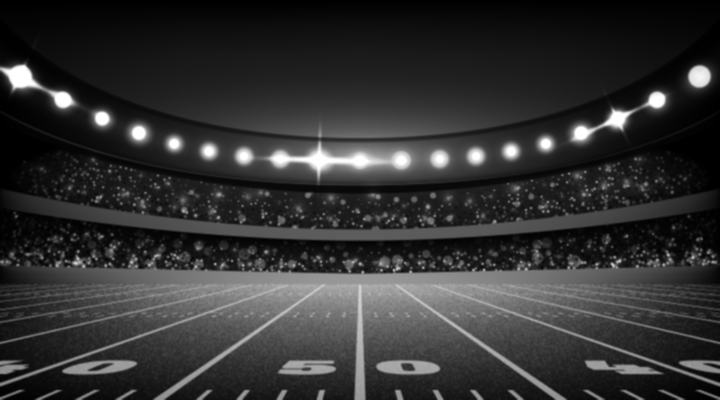

In [26]:
# applying a Gaussian filter to smooth over noise which might accidently be seen as edges
blurred = cv2.GaussianBlur(img, (3, 3), 0)
cv2_imshow(blurred)

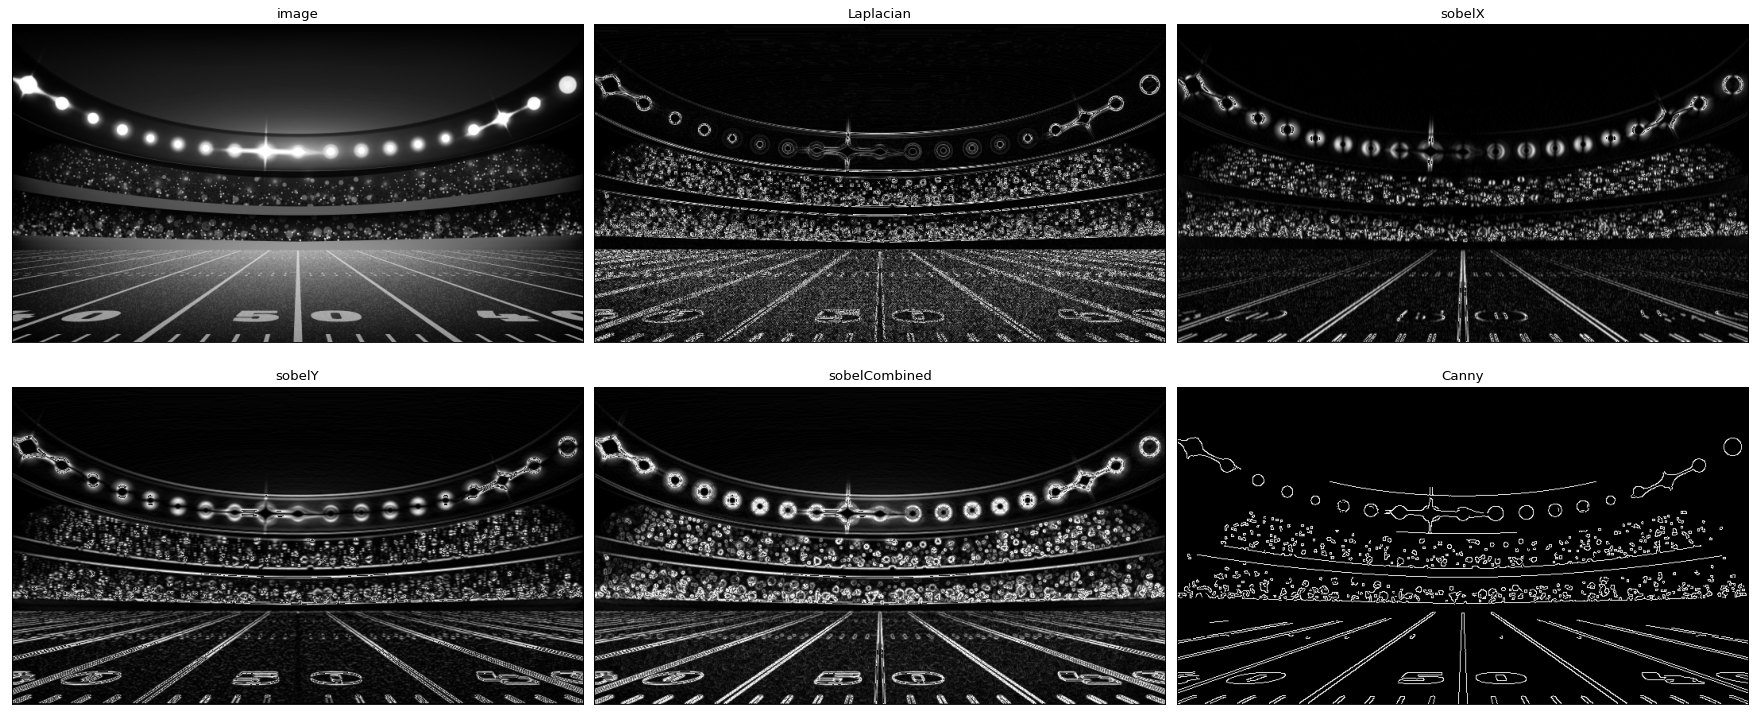

In [29]:
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(blurred, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(blurred, cv2.CV_64F, 0, 1)
edges = cv2.Canny(blurred,100,200)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

from matplotlib.pyplot import figure

figure(figsize=(28, 12), dpi=80)

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.subplots_adjust(wspace=0.02, hspace=0)
plt.show()

#https://gist.github.com/pknowledge/05d68179cdb364e4fa4db608517f8d17

Optimization of thresholds for Canny edge detection agorithm: https://pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/